Churn prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


converting the float datatype to int

In [5]:
df[['CustomerID','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']]=df[['CustomerID','Age','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB','Churn']].astype('int64')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   CustomerID                  100000 non-null  int64 
 1   Name                        100000 non-null  object
 2   Age                         100000 non-null  int64 
 3   Gender                      100000 non-null  object
 4   Location                    100000 non-null  object
 5   Subscription_Length_Months  100000 non-null  int64 
 6   Monthly_Bill                100000 non-null  int64 
 7   Total_Usage_GB              100000 non-null  int64 
 8   Churn                       100000 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 6.9+ MB


In [7]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73,236,0
1,2,Customer_2,62,Female,New York,1,48,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85,460,0
3,4,Customer_4,36,Female,Miami,3,97,297,1
4,5,Customer_5,46,Female,Miami,19,58,266,0


In [8]:
df.shape

(100000, 9)

In [9]:
df.isna().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

The dataset is clean

In [10]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,64.557310,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.227941,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.000000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.000000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.000000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [11]:
df.Gender.value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

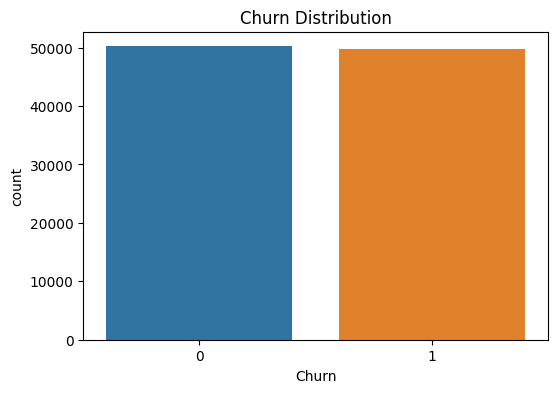

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

There are equal number of churned and not churned customers

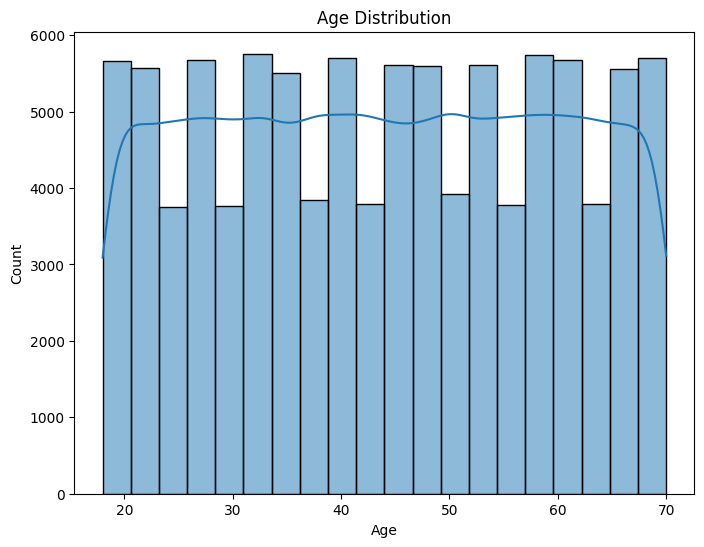

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

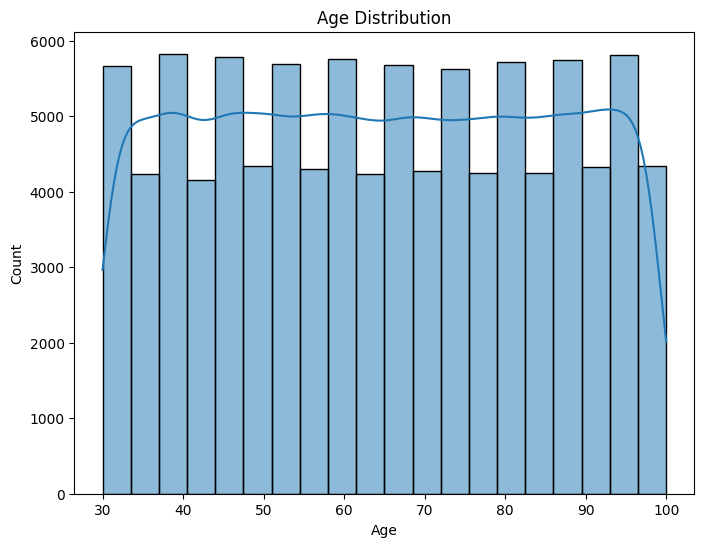

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Monthly_Bill'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

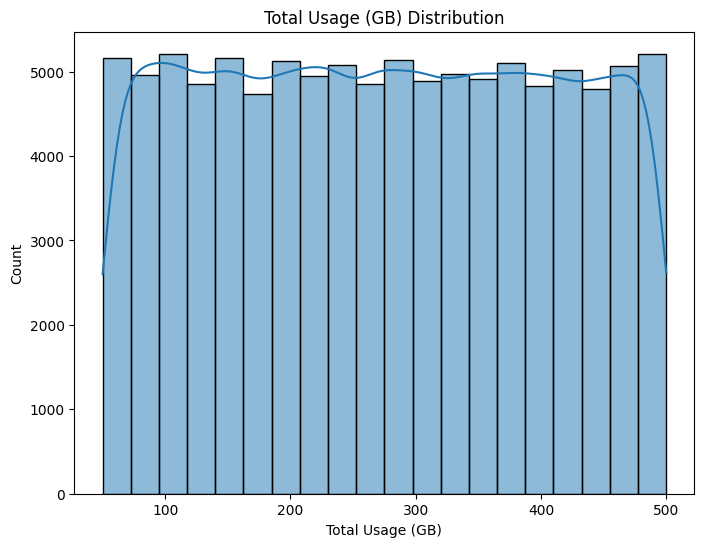

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Total_Usage_GB'], bins=20, kde=True)
plt.title('Total Usage (GB) Distribution')
plt.xlabel('Total Usage (GB)')
plt.show()

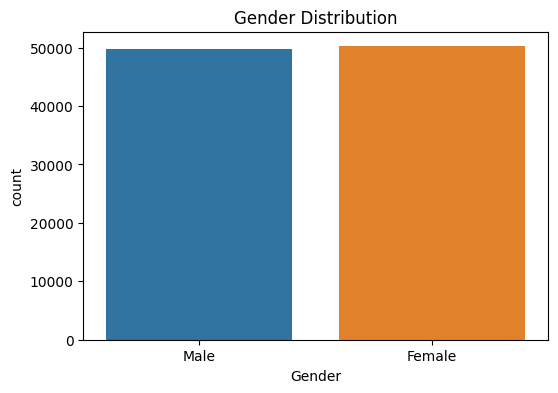

In [16]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

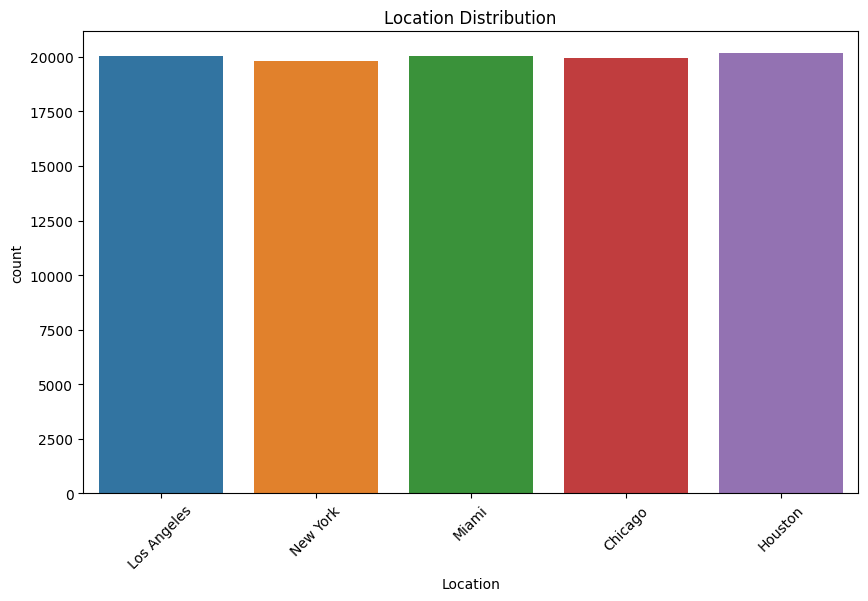

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', data=df)
plt.title('Location Distribution')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.Location.value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

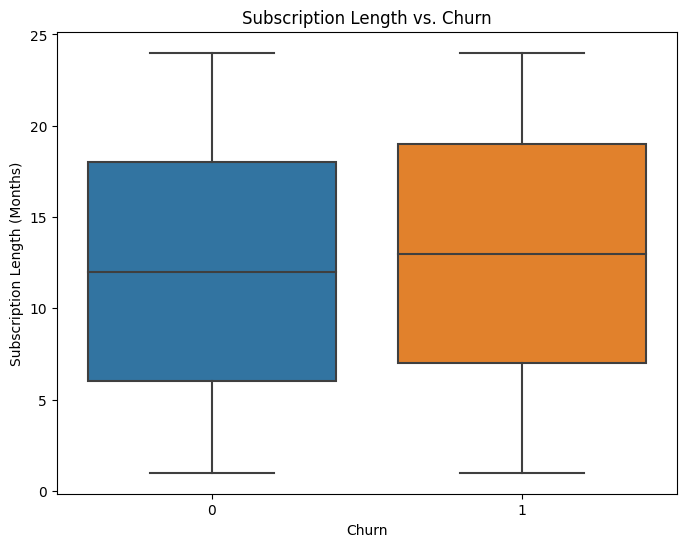

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Subscription_Length_Months', data=df)
plt.title('Subscription Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.show()

Not churned people have more subscription

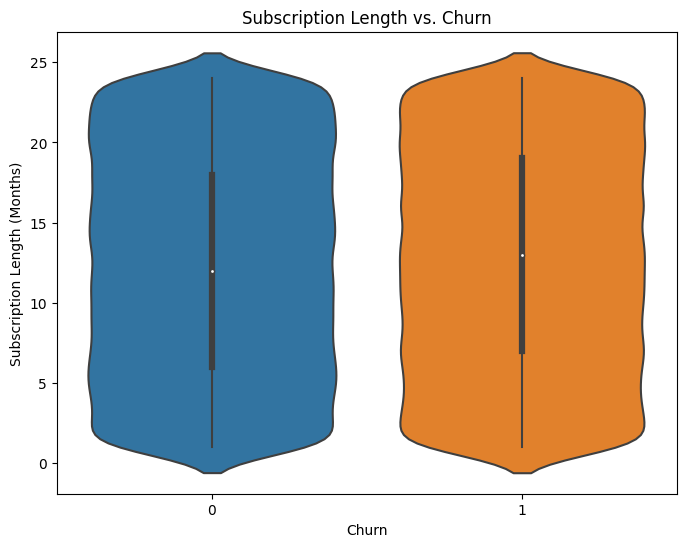

In [20]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Churn', y='Subscription_Length_Months', data=df)
plt.title('Subscription Length vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.show()

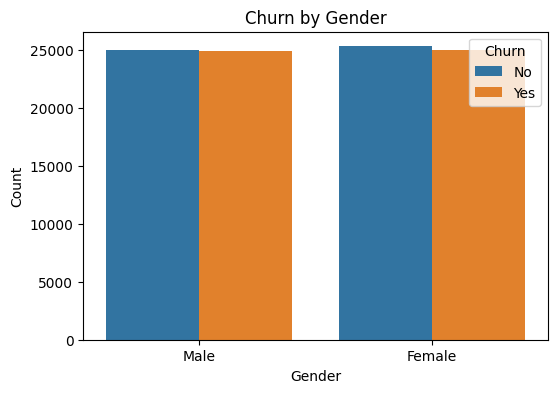

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Churn', data=df)
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

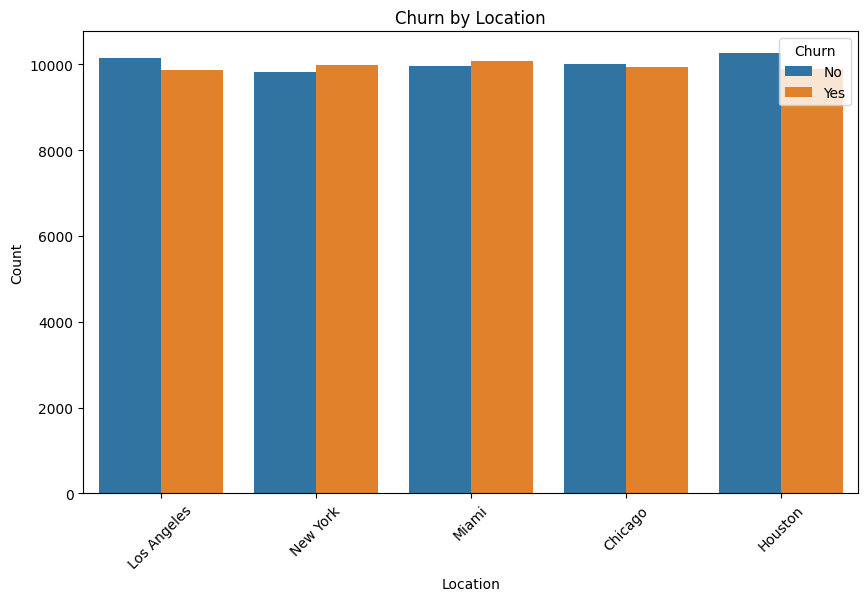

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Location', hue='Churn', data=df)
plt.title('Churn by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

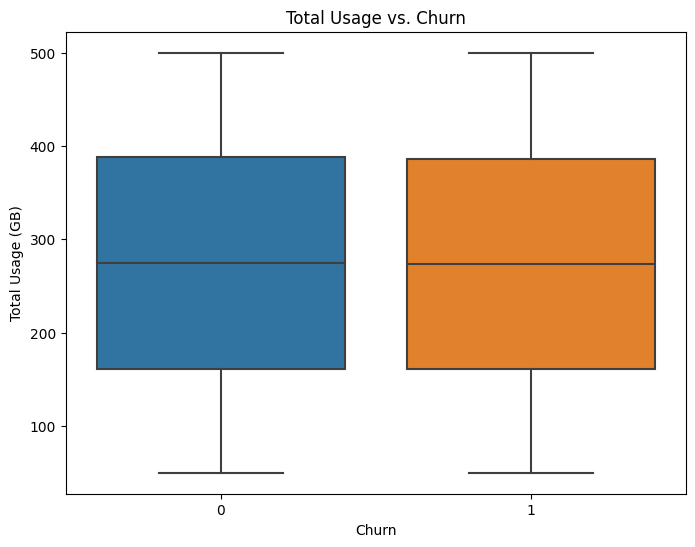

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='Total_Usage_GB', data=df)
plt.title('Total Usage vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Usage (GB)')
plt.show()

Building model

In [24]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [56]:
df1=df.copy()

Dropping column which are not important

In [57]:
df1.drop(columns=['CustomerID', 'Name'], inplace=True)

Encoding the categorical variable

In [27]:
df1 = pd.get_dummies(df1, columns=['Gender', 'Location'], drop_first=True)

In [28]:
X = df1.drop(columns=['Churn'])
y = df1['Churn']

Splitting the dataset

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [32]:
model.score(X_test, y_test)

0.50355

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf_model = RandomForestClassifier(random_state=42)

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]}

In [50]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

In [51]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [58]:
best_params = grid_search.best_params_

In [59]:
best_rf_model = RandomForestClassifier(random_state=42, **best_params)
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [60]:
best_rf_model.score(X_test, y_test)

0.49735

By using the two alogrithms we got to know that the accuracy is very low. Due to some reasons which we got from the visualization part.

 It is due there are equal number of churned and non churned customer that's why it is difficult for the model to learn to distinguish between the two groups

To improve the performance I have used Random Undersampling
Randomly remove samples from the majority class (non-churned customers) until the dataset is balanced.

In [33]:
from sklearn.utils import resample
majority_class = df1[df1['Churn'] == 0]
minority_class = df1[df1['Churn'] == 1]

In [34]:
desired_ratio = 0.2
sampled_majority_class = resample(majority_class, replace=False, n_samples=int(len(minority_class) * desired_ratio), random_state=42)

In [35]:
balanced_data = pd.concat([sampled_majority_class, minority_class])

In [36]:
X2 = balanced_data.drop(columns=['Churn'])
y2 = balanced_data['Churn']

In [37]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [38]:
model2 = LogisticRegression()

# Train the model
model2.fit(X2_train, y2_train)

LogisticRegression()

In [39]:
model2.score(X2_test, y2_test)

0.8322591445551184

In [61]:
rf_model1 = RandomForestClassifier(random_state=42)
rf_model1.fit(X2_train, y2_train)

RandomForestClassifier(random_state=42)

In [62]:
rf_model1.score(X2_test, y2_test)

0.8286599146229179

Now we got to know that both the model is giving good accuracy score